In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [31]:
data = pd.read_csv('/content/winequality-red.csv',low_memory=False,sep=';')
#data.head(10)
#data[data['quality']==6]
data[data['quality']==6]['fixed acidity'].max()

14.3

In [32]:
#Observing the information of the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [33]:
#Printing the basic statistical values

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [34]:
data.shape #To know the elements

(1599, 12)

In [35]:
#Printing all columns

data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [36]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [52]:
#Printing the unique quality number

sort=data['quality'].unique()
sort.sort()
sort

array([3, 4, 5, 6, 7, 8])

In [38]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

In [39]:
#Printing duplicate columns

data[data.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [41]:
#Printing duplicate columns after replacing values

data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

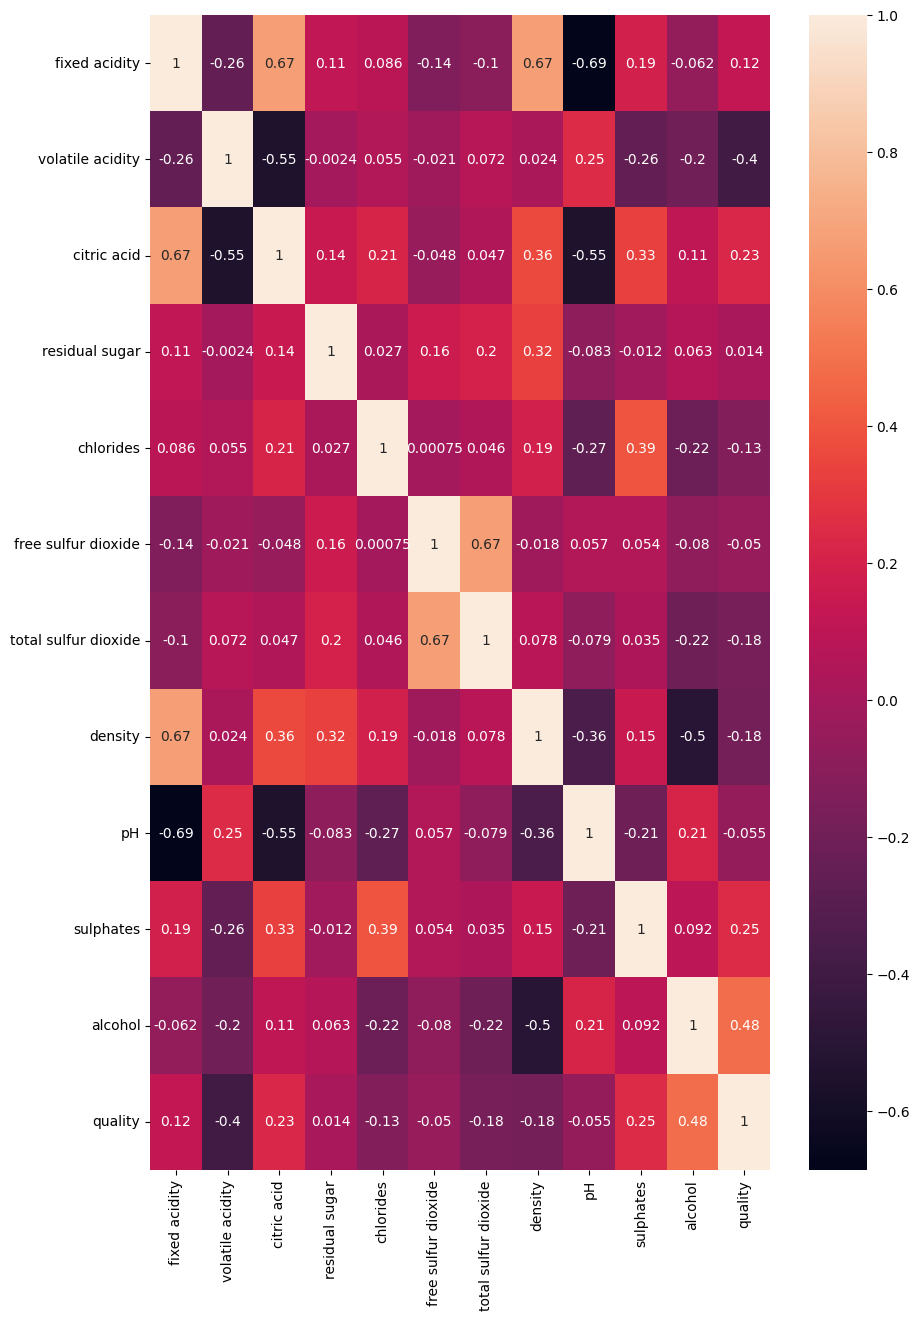

In [47]:
#Observing the correlation

plt.figure(figsize=(10,15))
corr=data.corr()
sns.heatmap(corr,annot=True)
plt.plot

In [55]:
#Visualizing the imbalance of data

data.columns
data['quality'].value_counts()


,count
quality,
5,577
6,535
7,167
4,53
8,17
3,10


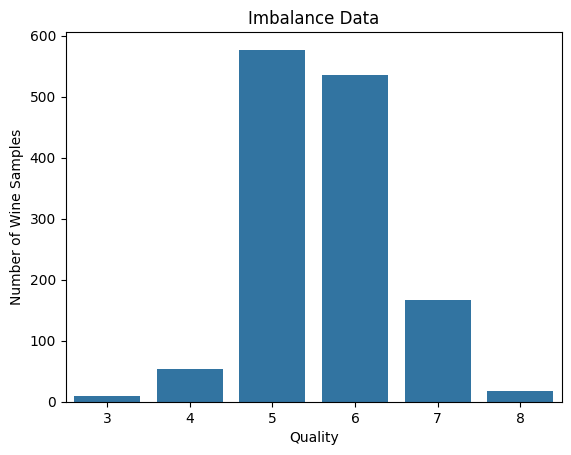

In [58]:
sns.barplot(x=data['quality'].value_counts().index,y=data['quality'].value_counts())
plt.xlabel('Quality')
plt.ylabel('Number of Wine Samples')
plt.title("Imbalance Data")
plt.show()

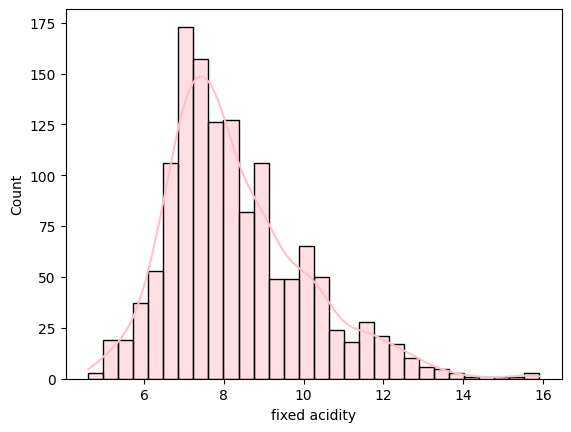

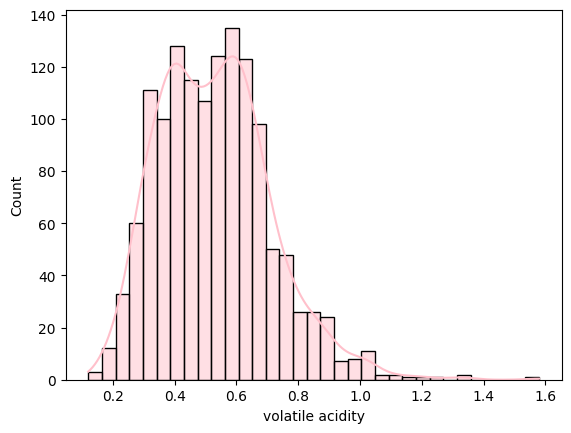

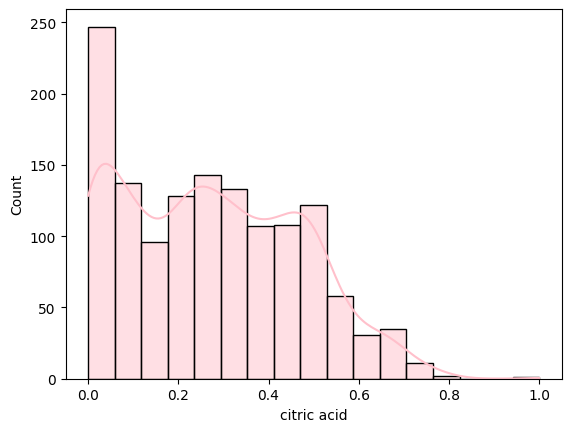

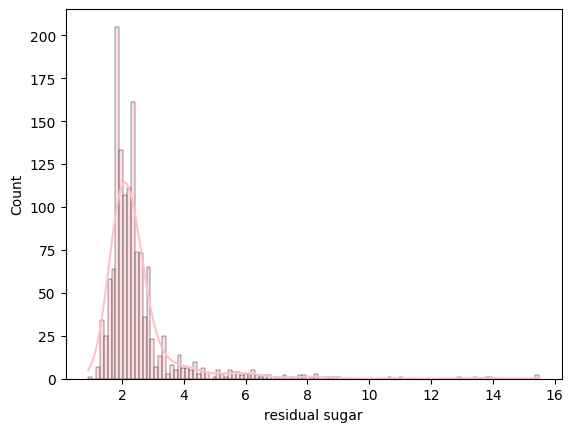

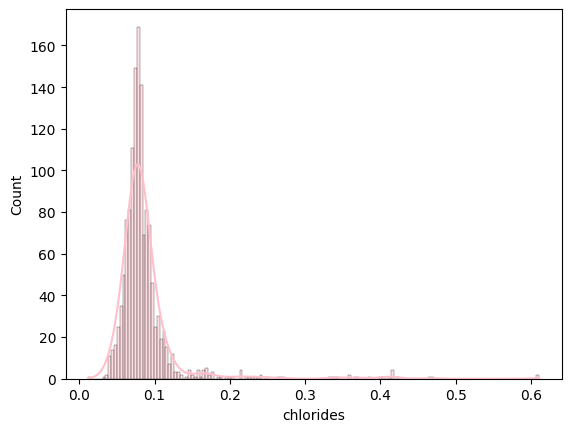

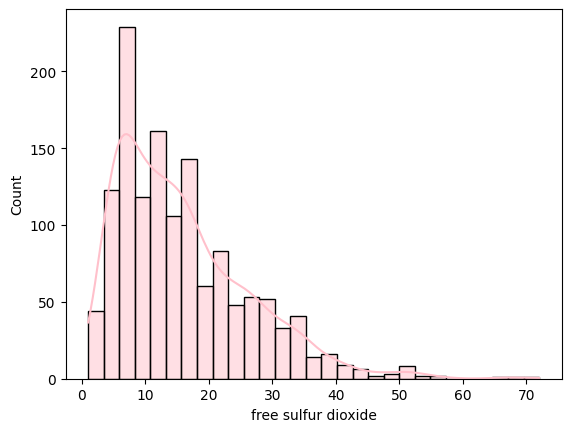

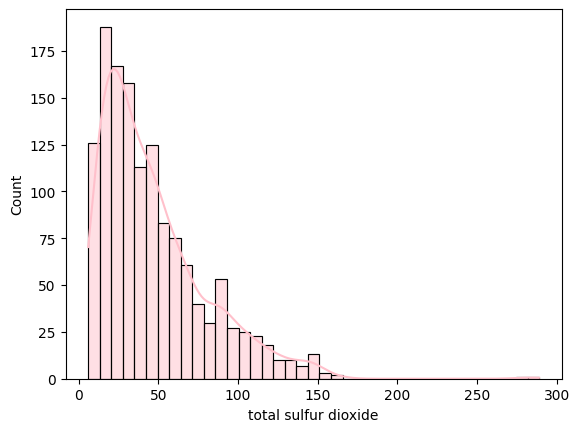

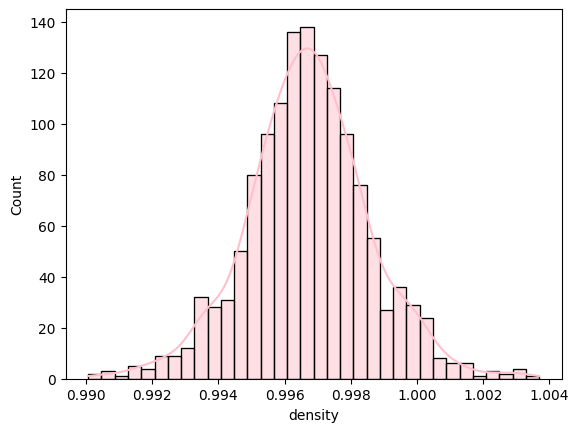

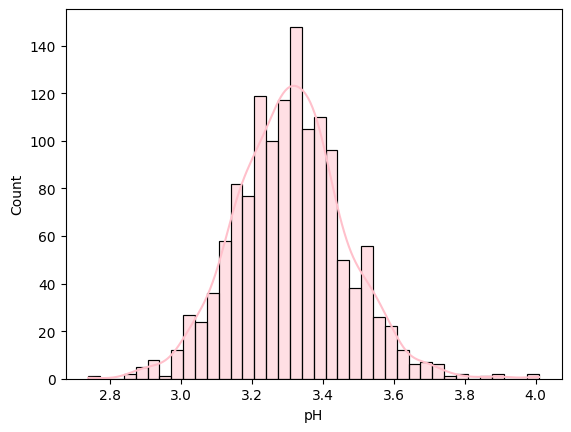

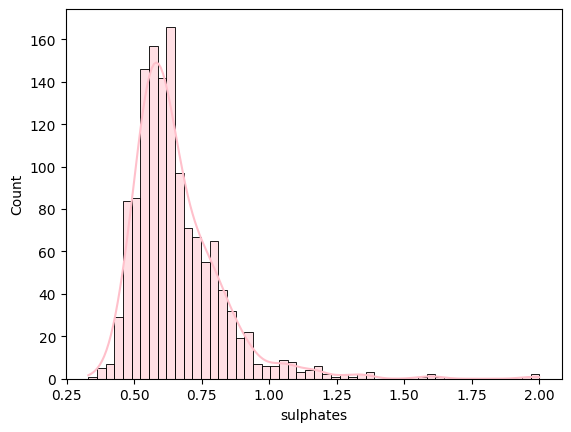

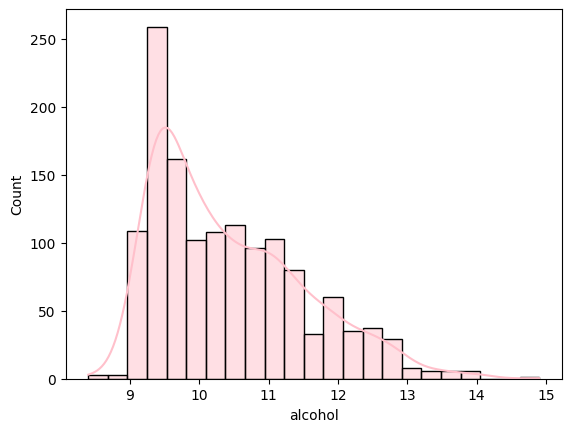

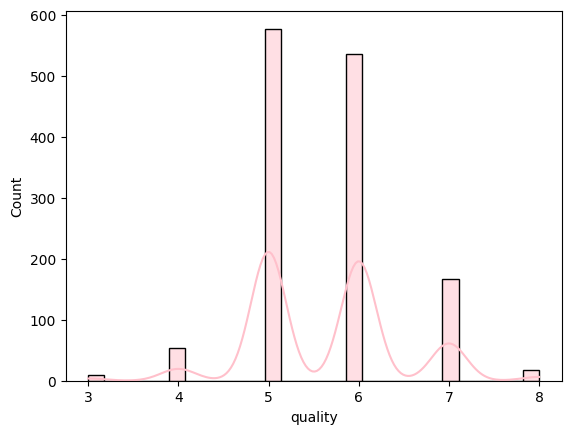

In [62]:
#Observing histogram for each feature

for columns in data.columns:
  sns.histplot(data[columns],kde=True,color='Pink')
  plt.show()

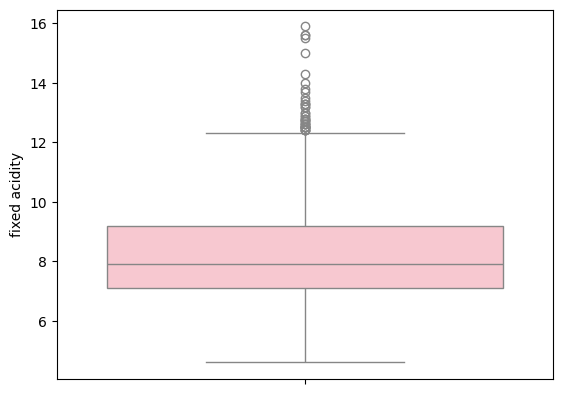

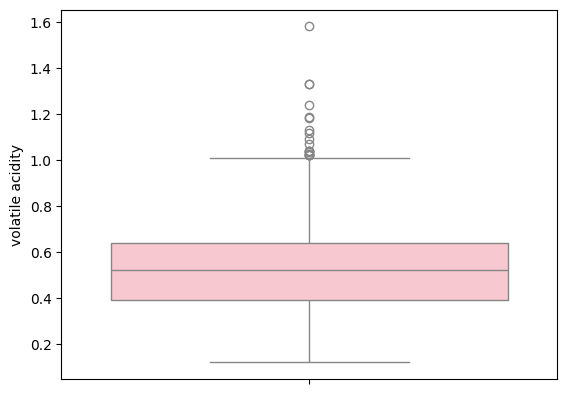

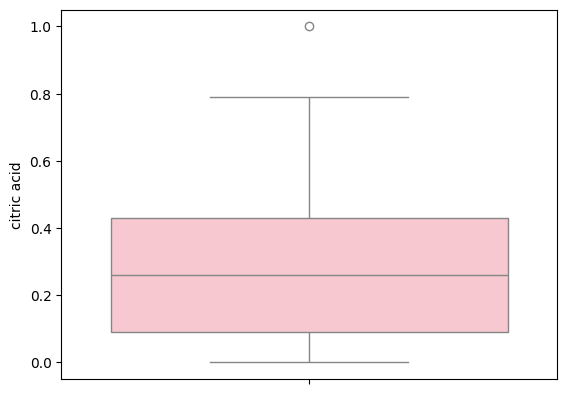

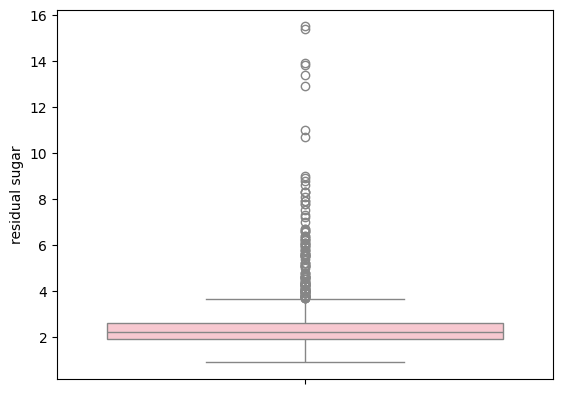

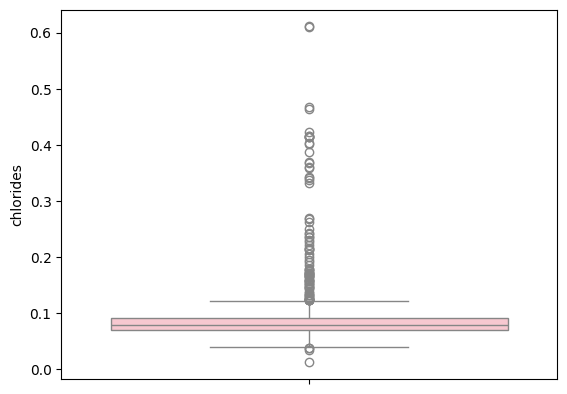

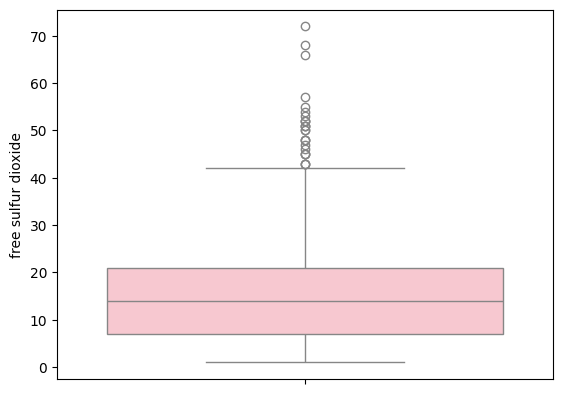

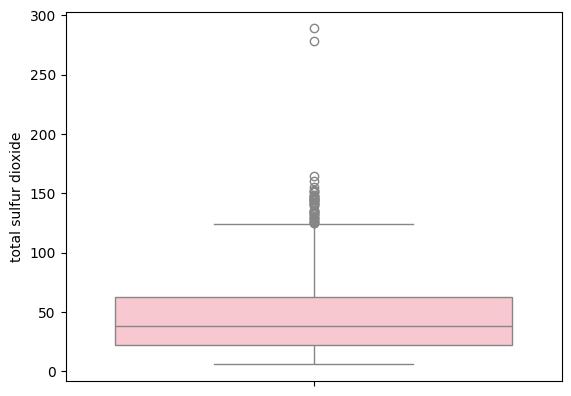

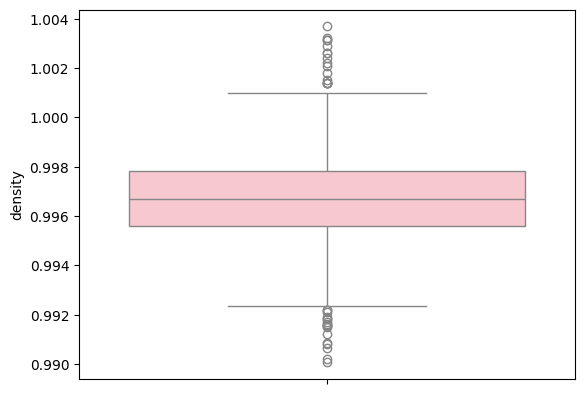

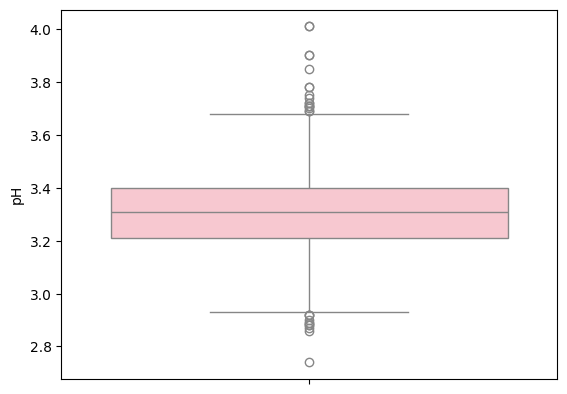

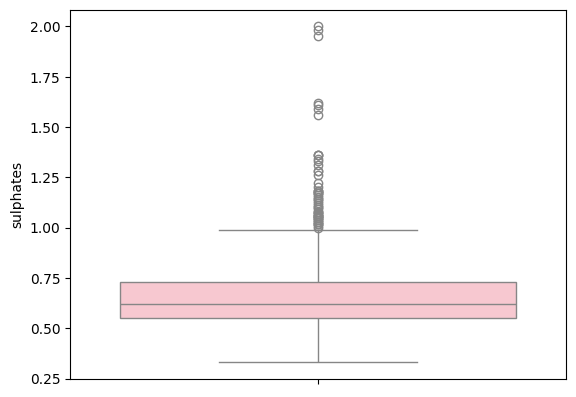

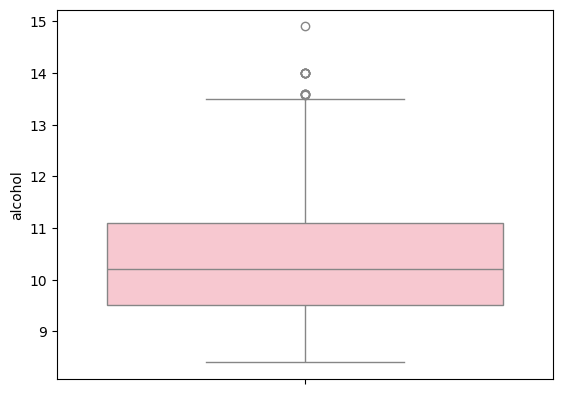

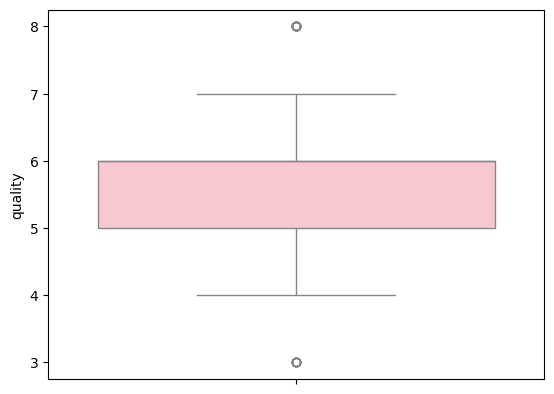

In [64]:
for columns in data.columns:
  sns.boxplot(data[columns],color='Pink') #The outliers are showing
  plt.show()

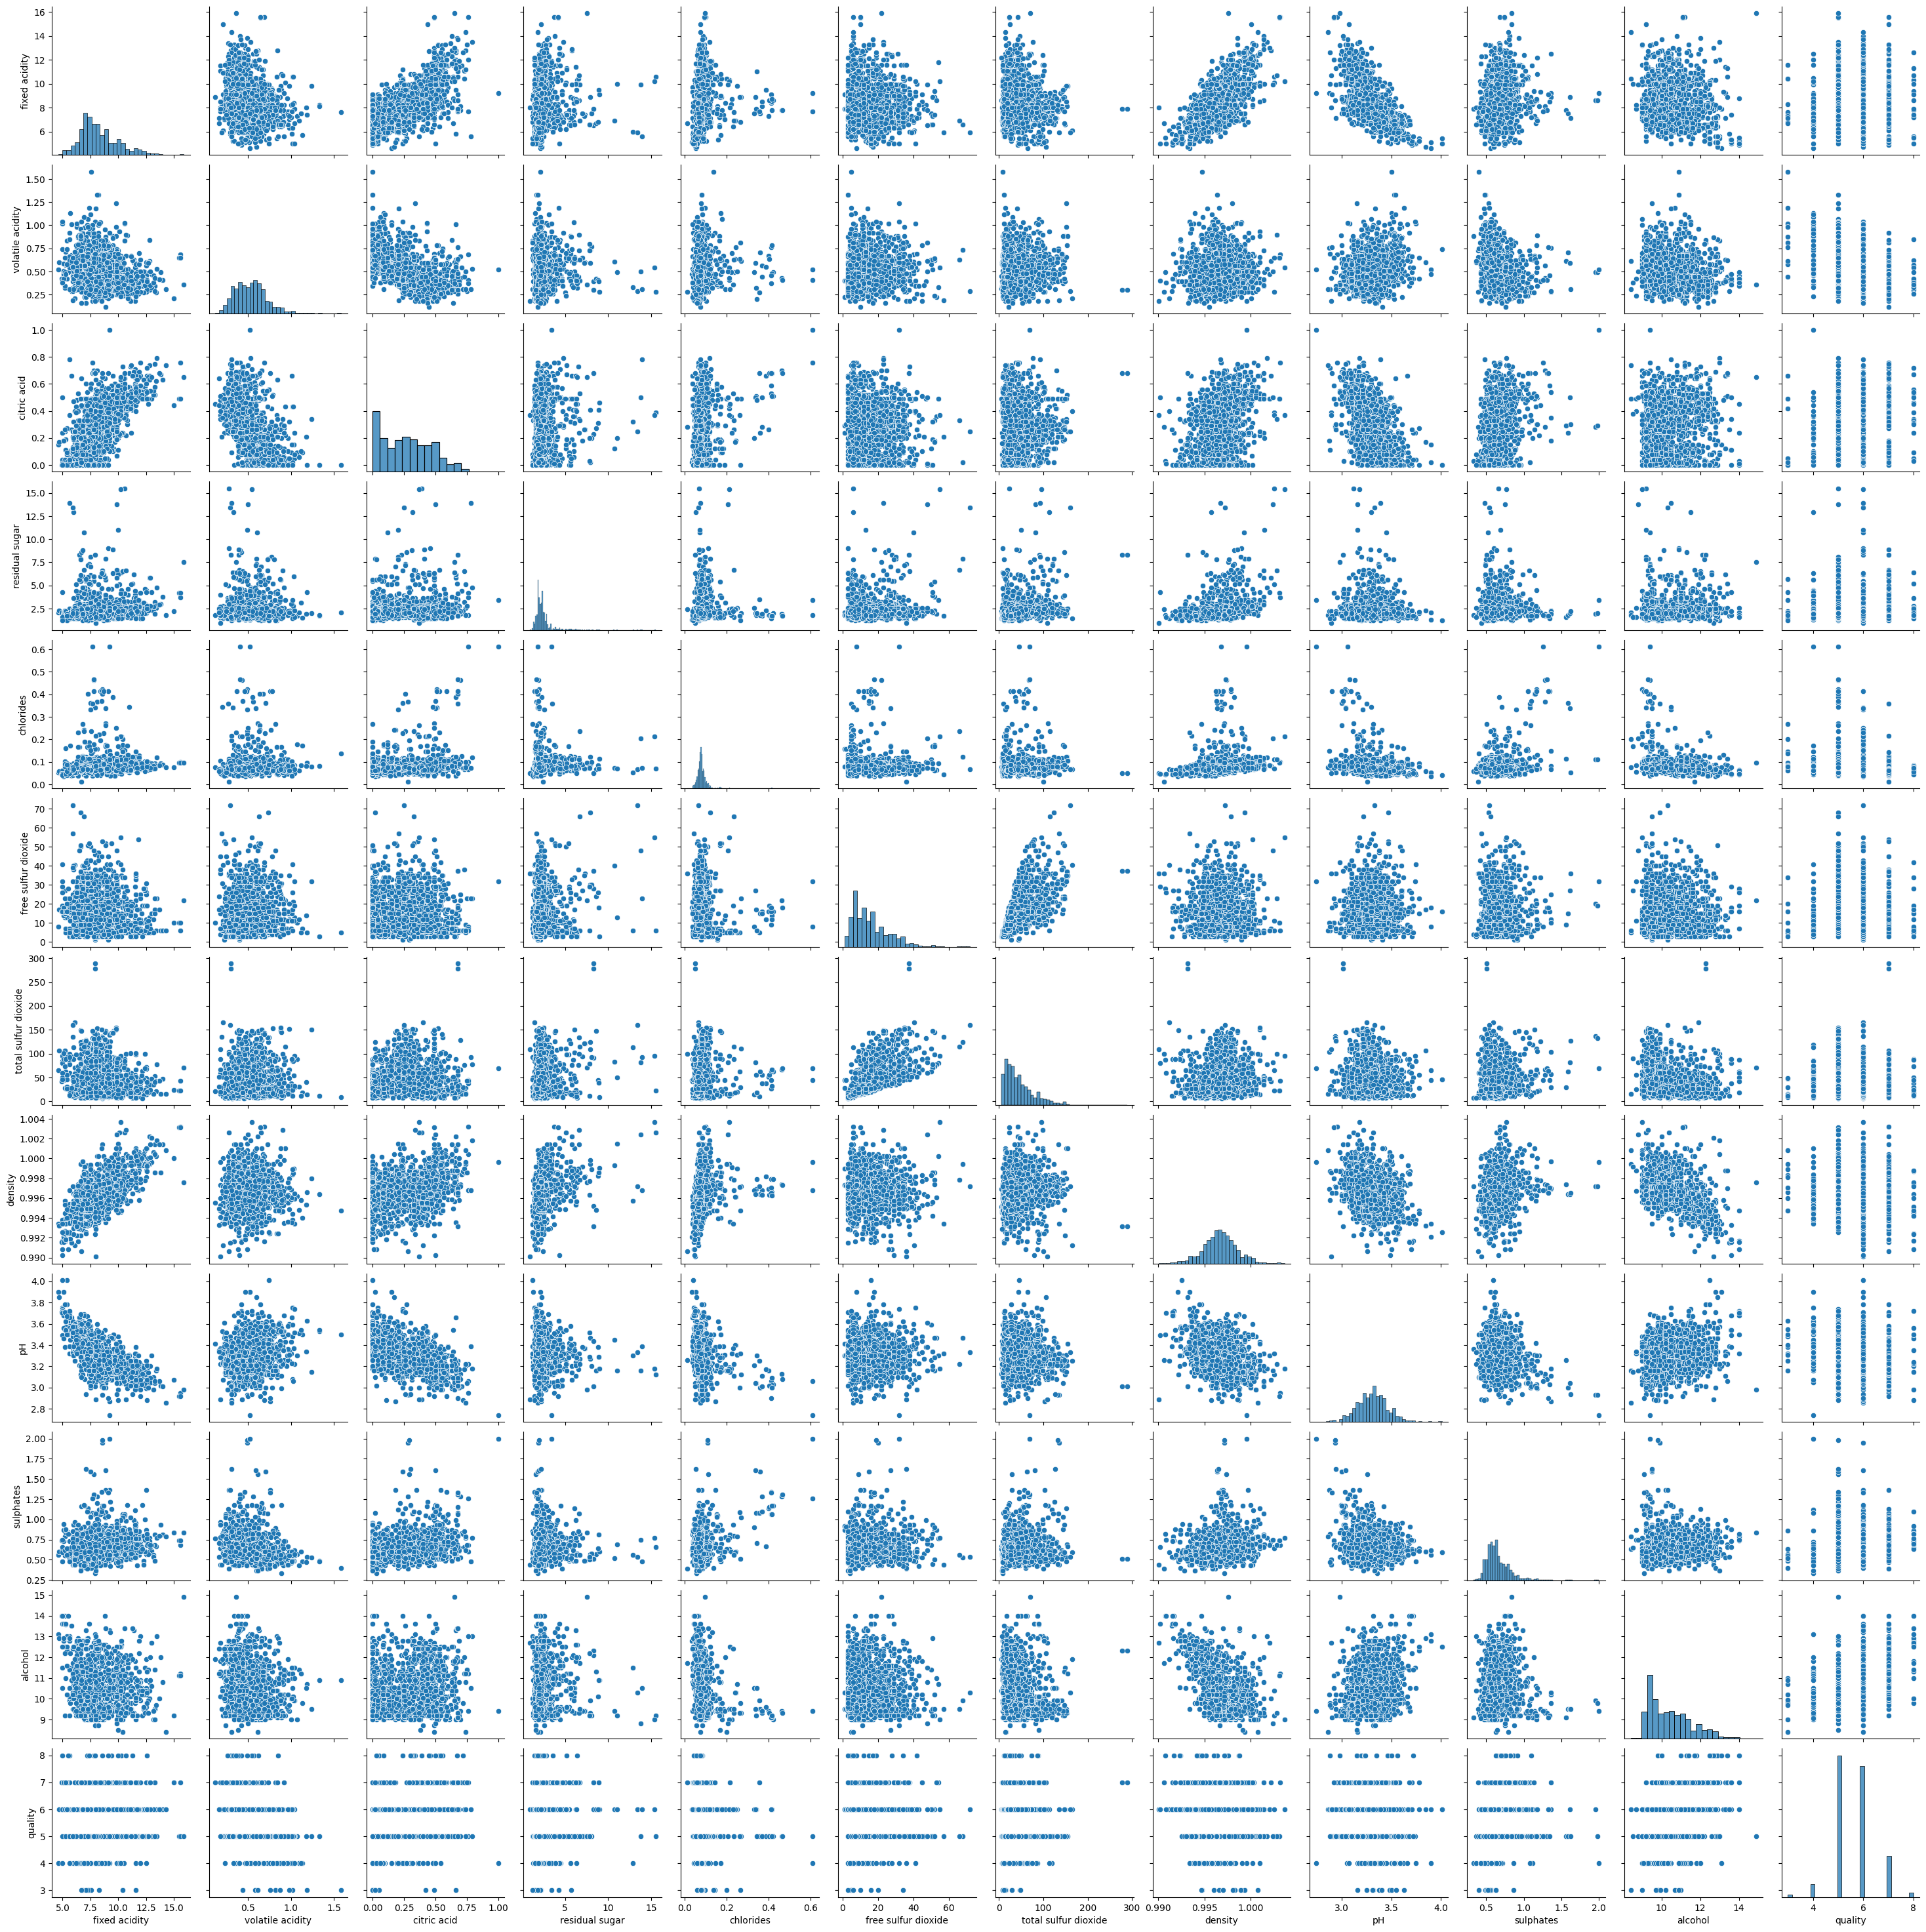

In [70]:
sns.pairplot(data)

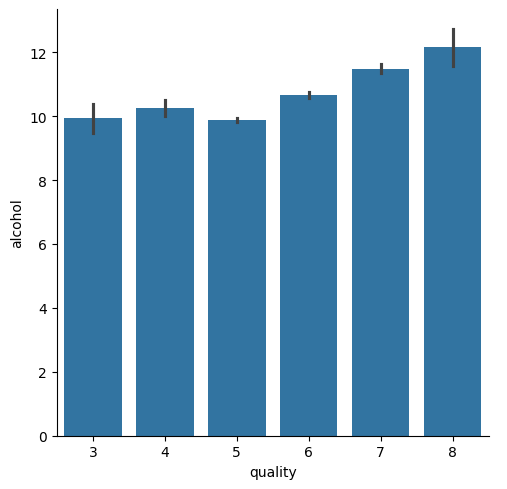

In [74]:
sns.catplot(x='quality',y='alcohol',data=data,kind='bar')#catplot means categorical plot
#Options are 'strip', 'swarm', 'box', 'boxen', 'violin', 'bar', 'count', and 'point'.

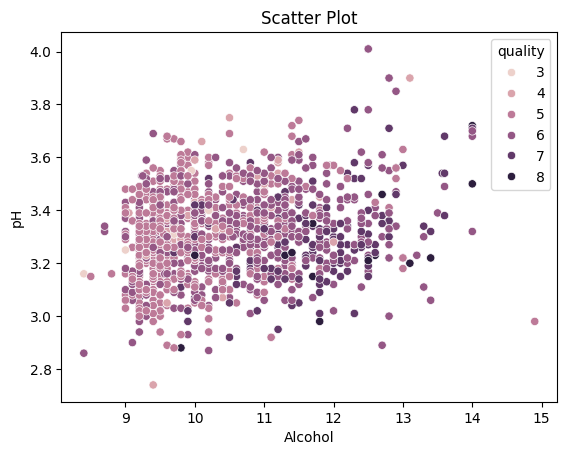

In [78]:
sns.scatterplot(x='alcohol',y='pH',hue='quality',data=data)
plt.xlabel('Alcohol')
plt.ylabel('pH')
plt.title("Scatter Plot")
plt.show()